In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    # Get the number of available GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")

    # Get the name of each GPU
    for i in range(num_gpus):
        gpu_name = torch.cuda.get_device_name(i)
        print(f"GPU {i}: {gpu_name}")

    # Get the current GPU device
    current_device = torch.cuda.current_device()
    print(f"Current GPU device: {current_device}")

    # Get GPU properties
    gpu_properties = torch.cuda.get_device_properties(current_device)
    print(f"GPU Properties:\n{gpu_properties}")
else:
    print("No GPU available. Switching to CPU.")

Number of available GPUs: 1
GPU 0: Tesla P100-PCIE-16GB
Current GPU device: 0
GPU Properties:
_CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [3]:
import torch 
import numpy as np

# Initializing a Tensor

## Directly from data

In [4]:
data = [[1,2],[3,4]]

x_data = torch.tensor(data)
print(type(data))
print(type(x_data))
x_data.device

<class 'list'>
<class 'torch.Tensor'>


device(type='cpu')

In [5]:
data = [[1,2],[3,4]]

x_data = torch.tensor(data,device = 'cuda')
print(type(data))
print(type(x_data))
x_data.device

<class 'list'>
<class 'torch.Tensor'>


device(type='cuda', index=0)

In [6]:
torch.rand(3,3)

tensor([[0.3592, 0.4156, 0.3104],
        [0.1947, 0.8089, 0.7729],
        [0.2900, 0.5267, 0.7454]])

# Basic Tensor operation

In [7]:
device = 'cpu'

if torch.cuda.is_available():
    device = 'cuda'
device

'cuda'

In [8]:
a = torch.randn(5,7)  # creating in cpu

a = a.to(device) # transfering to gpu
print(a.device)

cuda:0


# Checking How GPU is Faster Then CPU

In [9]:
setup = 'import torch'

gpu_code = '''
a1 = torch.randn(1000,1000,device='cuda')
a2 = torch.randn(1000,1000,device='cuda')
a = a1 @ a2
'''


cpu_code = '''
b1 = torch.randn(1000,1000,device='cpu')
b2 = torch.randn(1000,1000,device='cpu')
b = b1 @ b2
'''

In [10]:
import timeit

t_gpu = timeit.timeit(setup =setup, stmt = gpu_code,number = 1000)

t_cpu = timeit.timeit(setup =setup, stmt = cpu_code,number = 1000)


print(t_gpu)
print(t_cpu)

1.9051325059999726
20.081084802999953


# Neural Network module

In [13]:
from torch import nn
import matplotlib.pyplot as plt

In [12]:
ff = nn.Linear(10,10)
ff.state_dict()

OrderedDict([('weight',
              tensor([[ 0.0145, -0.1253,  0.0254, -0.2471,  0.0520, -0.1273, -0.3108, -0.0850,
                       -0.0124, -0.2822],
                      [-0.1552,  0.0029, -0.1082, -0.0479,  0.1030,  0.0218,  0.2590, -0.2182,
                       -0.1159, -0.2628],
                      [ 0.1779,  0.0997, -0.2881,  0.2548,  0.3129, -0.2198,  0.0220,  0.2562,
                        0.0951, -0.0068],
                      [ 0.0123, -0.1777, -0.1637,  0.2931,  0.1976,  0.0634,  0.0976,  0.2908,
                       -0.0139,  0.1686],
                      [-0.1635,  0.1044,  0.1315,  0.1072, -0.2745, -0.0410,  0.1992, -0.2900,
                       -0.1620,  0.0933],
                      [ 0.2054,  0.2457,  0.2136,  0.2849,  0.0746,  0.2658, -0.2122,  0.1507,
                        0.1032, -0.1069],
                      [-0.0370, -0.0346, -0.0963,  0.0389,  0.1464, -0.0567,  0.2130,  0.0605,
                       -0.0622,  0.0399],
                 

(array([[2., 1., 2., 1., 1., 3., 0., 0., 0., 0.],
        [1., 1., 1., 2., 1., 2., 1., 0., 0., 1.],
        [1., 1., 0., 0., 1., 1., 2., 1., 0., 3.],
        [0., 0., 2., 0., 1., 1., 2., 1., 1., 2.],
        [2., 0., 2., 0., 1., 0., 3., 1., 1., 0.],
        [0., 1., 0., 1., 0., 0., 2., 1., 3., 2.],
        [0., 0., 0., 2., 3., 3., 0., 1., 1., 0.],
        [1., 1., 0., 1., 3., 1., 1., 0., 1., 1.],
        [3., 1., 1., 0., 2., 2., 0., 0., 0., 1.],
        [0., 0., 1., 0., 1., 1., 1., 1., 1., 4.]]),
 array([-0.31076893, -0.24840352, -0.18603809, -0.12367268, -0.06130726,
         0.00105816,  0.06342358,  0.125789  ,  0.18815441,  0.25051984,
         0.31288525]),
 <a list of 10 BarContainer objects>)

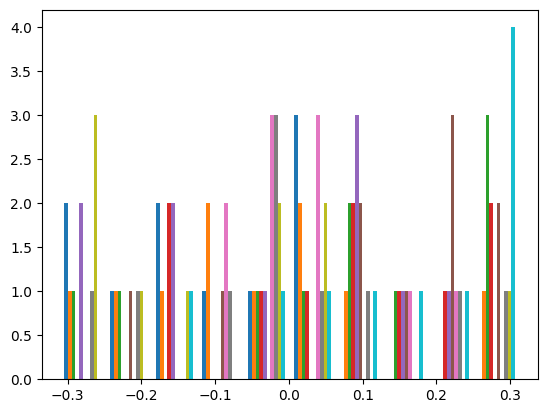

In [16]:
plt.hist(ff.state_dict()["weight"])

(array([10.,  6.,  9.,  7., 14., 14., 12.,  6.,  8., 14.]),
 array([-0.31076893, -0.24840352, -0.18603809, -0.12367268, -0.06130726,
         0.00105816,  0.06342358,  0.125789  ,  0.18815441,  0.25051984,
         0.31288525]),
 <BarContainer object of 10 artists>)

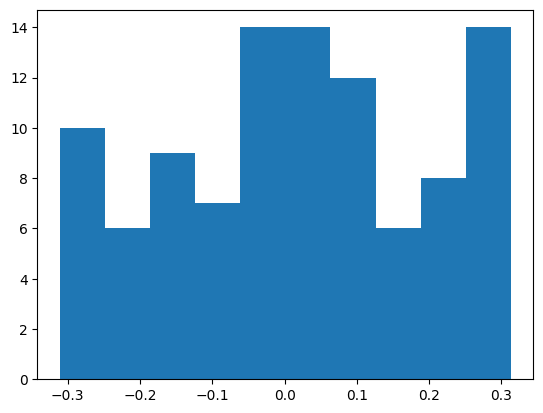

In [17]:
plt.hist(ff.state_dict()["weight"].reshape(-1))

In [18]:
ff.weight.data.normal_(mean=0,std=0.5)  #normalization

tensor([[ 0.2981, -0.2910, -0.8845, -0.2079, -0.2845,  0.7389,  0.3836,  1.1599,
          1.0659, -1.2720],
        [-0.1840, -1.1571, -0.8084,  0.0033, -0.5038,  0.5089,  0.8980, -0.3050,
          1.0067, -0.2463],
        [ 0.4398, -0.3124,  0.5850,  0.0334, -0.0960,  0.4984,  0.4755, -0.0967,
          0.2065, -0.5260],
        [ 0.2489,  0.2711,  0.8438,  0.7326,  0.2320, -0.5036, -0.1229, -0.2541,
          0.3090, -0.4178],
        [ 0.1066,  0.1302, -0.3858,  0.3900,  1.3197,  1.1563, -0.2762, -0.4980,
         -0.4923, -0.1201],
        [ 0.7677,  0.1211, -0.6825,  0.1585, -0.9558, -0.2244,  0.6356, -0.3080,
         -0.8482,  0.5101],
        [-0.7542,  0.0760, -0.3629,  0.7151, -0.2128, -0.4141,  0.4521,  0.0506,
         -0.4702, -0.7358],
        [-0.0915, -0.2217, -0.3406, -0.3750, -0.0573,  0.7179, -0.7618, -0.7722,
         -0.6173, -1.2723],
        [ 0.0490, -0.2223,  0.4108, -0.1138, -0.0713,  0.5595, -0.1693, -0.7027,
         -0.2794, -0.6478],
        [ 0.2684,  

(array([ 4.,  7., 10., 17., 18., 13., 12., 10.,  5.,  4.]),
 array([-1.27231479, -1.01311779, -0.75392085, -0.49472392, -0.23552695,
         0.02367002,  0.28286698,  0.54206395,  0.80126089,  1.06045783,
         1.31965482]),
 <BarContainer object of 10 artists>)

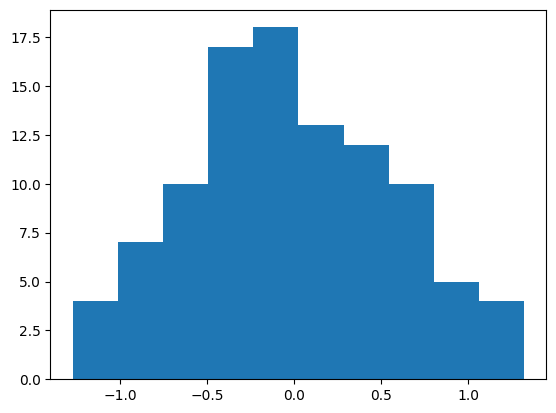

In [19]:
plt.hist(ff.state_dict()["weight"].reshape(-1))